# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn.linear_model

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2]
y= y.reshape(-1,1)

In [4]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100, 1)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [5]:
def Sigmoid(X,theta):
    K = np.dot(X,theta)
    H = 1/(1+np.exp(-K))
    return H

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [6]:
def computeCost(X,y,theta):
    h = Sigmoid(X,theta)
    return -1/X.shape[0] * ((y*np.log(h)).sum() + ((1-y)*np.log(1-h)).sum() )

In [7]:
def computeCostNonVec(X, y, theta):
    H = Sigmoid(X,theta)
    somme = 0
    for i in range(H.shape[0]):
        if(y[i]==0):
            somme = somme - math.log(1-H[i])
        else:
            somme = somme - math.log(H[i])
    return (1/X.shape[0])*somme

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [8]:
def gradientDescent(X, y, theta, alpha, iterations):
    vals = []
    for i in range(iterations):
        vals = vals + [theta[0]+0,theta[1]+0,theta[2]+0,computeCost(X,y,theta)]
        theta = np.subtract(theta, alpha/X.shape[0]*np.sum(np.dot(np.transpose(X), Sigmoid(X,theta)- y),axis=1).reshape(-1,1))
    return theta,vals

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [9]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [10]:
computeCostNonVec(X,y,theta)

0.693147180559946

In [11]:
computeCost(X,y,theta)

0.6931471805599453

Appel des la fonction de calcul du gradient

In [12]:
# paramètres
iterations = 20000
alpha = 0.06
# Appel
theta,historique = gradientDescent(X, y, theta, alpha, iterations);
theta

array([[-17.60445449],
       [  0.72934614],
       [  0.7015691 ]])

In [13]:
computeCost(X,y,theta)

0.21490551311294848

Traçage de la fonction du coût

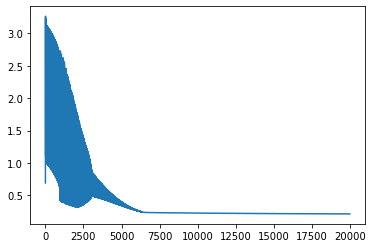

In [14]:
plt.plot(np.arange(iterations),historique[3::4])

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [22]:
def drawLine(X,theta,style):
    b = theta[0]
    w1, w2 = theta[1],theta[2]
    
    c = -b/w2
    m = -w1/w2
    
    print(m,'x',c)
    
    xmin, xmax = X[:,1].min(), X[:,1].max()
    ymin, ymax = X[:,2].min(), X[:,2].max()
    xd = np.array([xmin, xmax])
    yd = m*xd +c
    plt.plot(xd, yd, 'k', lw=1, ls=style)

# Affichage 
Graphe representant les acceptations selon les caracteristiques

[-1.03959275] x [25.09297317]


Text(0, 0.5, 'Note module 2')

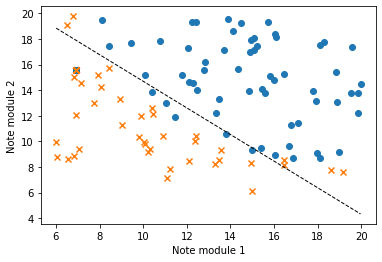

In [23]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

drawLine(X,np.array(theta),'--')

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')

Prédire des valeurs de y

In [17]:
# Predire pour des notes note1= 9 et note2=17
if(Sigmoid(np.array([1,9,17]),theta)>0.5):
    print("L'etudiant passe")
else:
    print("L'etudiant echoue")

L'etudiant passe


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [18]:
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X, np.ravel(y))

LogisticRegression()

In [19]:
np.append(clf.intercept_[0],(clf.coef_.T[1:]))

array([-22.9317941 ,   0.94159401,   0.91667069])

[-1.03959275] x [25.09297317]
-1.0271889589845034 x 25.016392780344347


Text(0, 0.5, 'Note module 2')

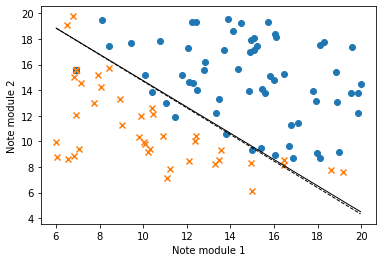

In [24]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

drawLine(X,np.array(theta),'--')
drawLine(X,np.append(clf.intercept_[0],(clf.coef_.T[1:])),'-')

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 25 Mars 2022 à 22h


In [21]:
# bonne chance